In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import json
import re

In [2]:
data = None
with open('news_2020-04-07.json') as f:
    data = json.load(f)


In [3]:
raw = ''
for i in range(len(data)):
    raw += data[i][0]
    raw += data[i][1]

In [4]:
with open('news_2020-04-08.json') as f:
    data = json.load(f)

In [5]:
for i in range(len(data)):
    raw += data[i][0]
    raw += data[i][1]

In [6]:
len(raw)

149034

In [7]:
def clean_text( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review) 
    #Remove javascript elements
    for script in review_text(["script", "style"]):
        script.extract()    # rip it out

    # get text
    review_text = review_text.get_text()
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [11]:
text = clean_text(raw)
text = text.replace('said', '')
text = text.replace('say', '')
text = text.replace('saying', '')

In [12]:

wordcloud = WordCloud(max_font_size=180, max_words=100, background_color="white", width=1200, height=1000).generate(text)
wordcloud.to_file("output/world_cloud.png")


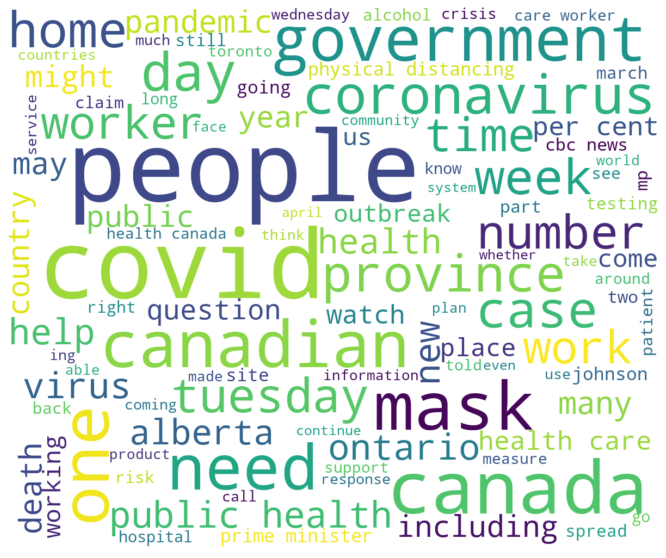

In [13]:
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()